# Importing Libraries

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading and Opening Dataset

In [8]:
performance = pd.read_csv(r"C:\Users\Jordy\Downloads\student-mat.csv",  delimiter=';')

In [9]:
performance.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Checking Missing Values 

In [10]:
performance.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

##### There are no missing values in my dataset so that makes a lot of my job much easier. No need to clean any missing values.

# One-Shot Encoding Categorical Features

In [15]:
performance_encoded= pd.get_dummies(performance, drop_first=True)

# Correlation Matrix 

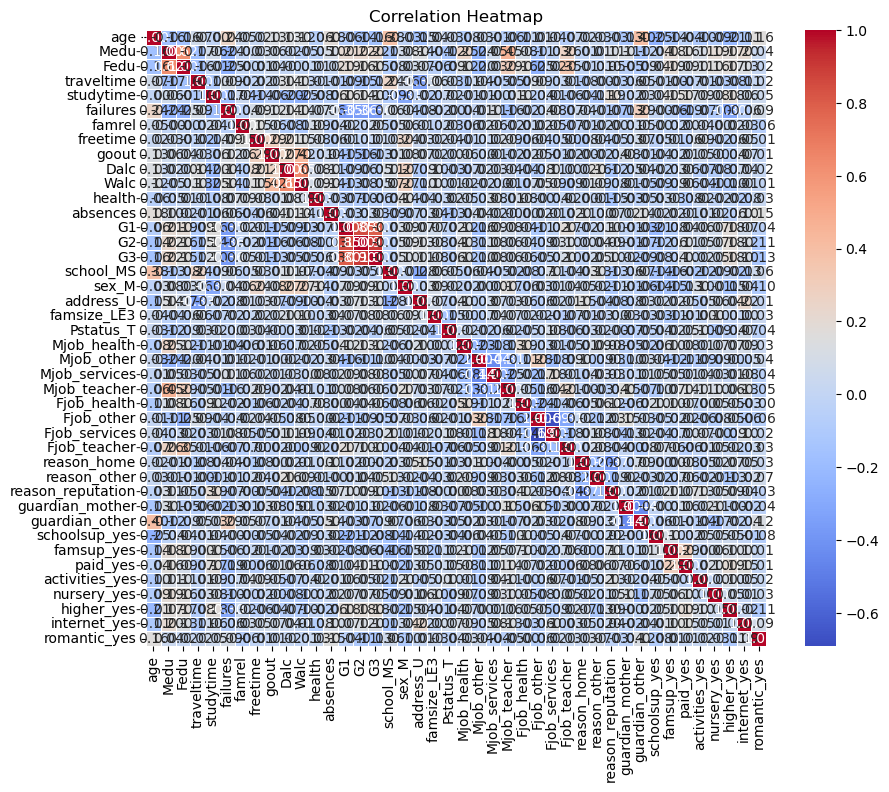

                        age      Medu      Fedu  traveltime  studytime  \
age                1.000000 -0.163658 -0.163438    0.070641  -0.004140   
Medu              -0.163658  1.000000  0.623455   -0.171639   0.064944   
Fedu              -0.163438  0.623455  1.000000   -0.158194  -0.009175   
traveltime         0.070641 -0.171639 -0.158194    1.000000  -0.100909   
studytime         -0.004140  0.064944 -0.009175   -0.100909   1.000000   
failures           0.243665 -0.236680 -0.250408    0.092239  -0.173563   
famrel             0.053940 -0.003914 -0.001370   -0.016808   0.039731   
freetime           0.016434  0.030891 -0.012846   -0.017025  -0.143198   
goout              0.126964  0.064094  0.043105    0.028540  -0.063904   
Dalc               0.131125  0.019834  0.002386    0.138325  -0.196019   
Walc               0.117276 -0.047123 -0.012631    0.134116  -0.253785   
health            -0.062187 -0.046878  0.014742    0.007501  -0.075616   
absences           0.175230  0.100285 

In [21]:
corr_matrix = performance_encoded.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
print (corr_matrix)

##### Too many features, I will remove the self correlations and then try to list the correlation values from highest to lowest.


In [25]:
corr_pairs = corr_matrix.unstack()
    
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]


sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)


sorted_corr_pairs

top_20_corr = sorted_corr_pairs.head(20)


top_20_corr

G2               G3                 0.904868
G3               G2                 0.904868
G2               G1                 0.852118
G1               G2                 0.852118
                 G3                 0.801468
G3               G1                 0.801468
Fjob_services    Fjob_other         0.690275
Fjob_other       Fjob_services      0.690275
Dalc             Walc               0.647544
Walc             Dalc               0.647544
Medu             Fedu               0.623455
Fedu             Medu               0.623455
Mjob_teacher     Medu               0.454911
Medu             Mjob_teacher       0.454911
guardian_other   guardian_mother    0.444143
guardian_mother  guardian_other     0.444143
Mjob_other       Mjob_services      0.442507
Mjob_services    Mjob_other         0.442507
goout            Walc               0.420386
Walc             goout              0.420386
dtype: float64

##### I am realizing that because a lot of the features can easily relate to one another, I am getting some very strong values that don't necessarily tell me much about things that would impact grade. What I do see is that the grades in themselves are very strongly correlated, meaning that what someone gets in the first period is a big predictor of what their final grade will end up being, which makes complete sense. Now what I will do is just explore the correlations to the grades by the features.

In [29]:
g3_corr = corr_matrix["G3"].drop("G3")  


sorted_g3_corr = g3_corr.reindex(g3_corr.abs().sort_values(ascending=False).index)


sorted_g3_corr

G2                   0.904868
G1                   0.801468
failures            -0.360415
Medu                 0.217147
higher_yes           0.182465
age                 -0.161579
Fedu                 0.152457
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
Mjob_other          -0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
health              -0.061335
Pstatus_T           -0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                -0.054660
Fjob_other          -0.053483
reason_other         0.052008
Walc                -0.051939
nursery_yes          0.051568
famrel               0.051363
school_MS 

##### Ok, now that I understand the somewhat the correlations between the features and my target variable of G# which is the final grade for the class, I now understand a little bit which features might be the most important to continue taking a look at. I understand that features Failiures (number of times they've failed in the past), Medu(mothers education level), higher_yes(whether they want to pursue higher education), age, and Fedu(fathers education) all play a decent role in being able to determine final grades. In addition, I noticed that G1 and G2 are very highly correlated which makes sense because usually performance tends to stay the same throughout a class. What I will like to take from this is that I want to build a model with important features that can somewhat predict whether a kid is in danger of failing and use that as some kind of warning for early intervention, and then wait until G1 grades and then depending on those maybe inacting some sort of further intervention. I would also like to maybe take a further look at some of the nominal features that I feel like would be determinig factors.

# Medu (Mothers Education) Analysis 

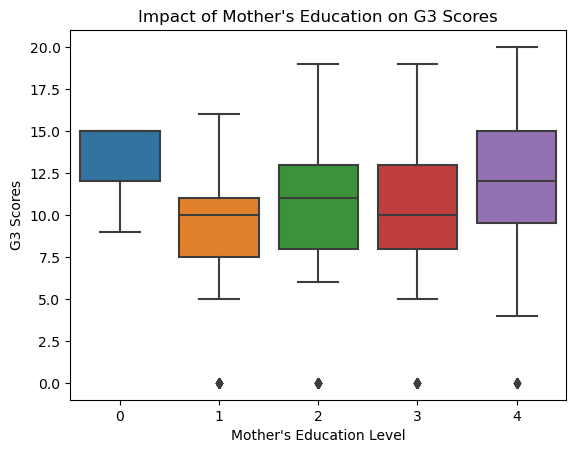

In [31]:
sns.boxplot(x='Medu', y='G3', data=performance)
plt.title('Impact of Mother\'s Education on G3 Scores')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('G3 Scores')
plt.show()

##### Very interesting pattern observed here. I see that with students who's mothers have no education tend to perform the best and following close second is students whose mothers end up on the higher end of the education rating. I would have assumed that students whose mother have no education would perform much worse. We need to understand why this is the case. I want to further understand what is the magnitude of this impact. Maybe understand the sampling size of the no education students so I know if its just a lack of enough information or not.

In [32]:
medu_counts = performance['Medu'].value_counts()
print (medu_counts)

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


In [33]:
medu_zero = performance[performance['Medu'] == 0]

# Print the G3 scores for people with Medu 0
print(medu_zero[['Medu', 'G3']])

     Medu  G3
127     0   9
249     0  15
324     0  15


##### Ok, I see what is going on here, there is just a lack of data for the students whose mothers have zero education. There is only 3 instances and it can be considered somewhat of an outlier. It is a good thing we further explroed this instead of just going with what was thought.

# Failures Analysis

### Descriptive Stats

In [35]:
performance['failures'].describe()

count    395.000000
mean       0.334177
std        0.743651
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [36]:
performance['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

### Visualization

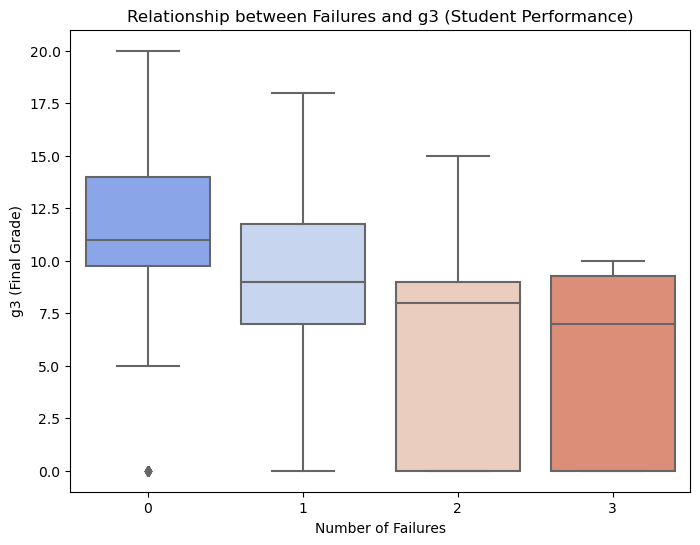

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x='failures', y='G3', data=performance, palette='coolwarm')
plt.title('Relationship between Failures and g3 (Student Performance)')
plt.xlabel('Number of Failures')
plt.ylabel('g3 (Final Grade)')
plt.show()

##### What we can see here is that students who have 2+ amount of past classes failed are at danger of lower grades and performing lower. The more someone fails a class the less they tend to perform in future classes. Again, this makes sense ideally. Students who have failed classes demonstrate a history of struggling with courses and this is something that we know. So we can picture that interventions be had once we see a student fail a class.

# Age Analysis 

In [39]:
performance['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

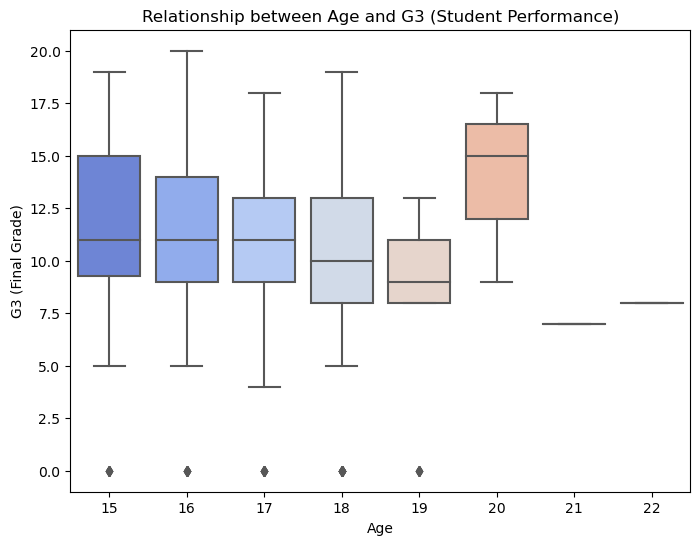

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='age', y='G3', data=performance, palette='coolwarm')
plt.title('Relationship between Age and G3 (Student Performance)')
plt.xlabel('Age')
plt.ylabel('G3 (Final Grade)')
plt.show()

In [42]:
age_counts = performance['age'].value_counts()
print(age_counts)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


#### Again, we might have some outliers in this data. After age 18, the occurences become much less so I will take this with a grain of salt. but from all other ages, I am able to tell that there is a slight pattern of the odler one gets the less they are able to perform in their classes. But I dont feel like this is a strong relationship I want to continue exploring.

# Higher (Do they want higher education) Analysis

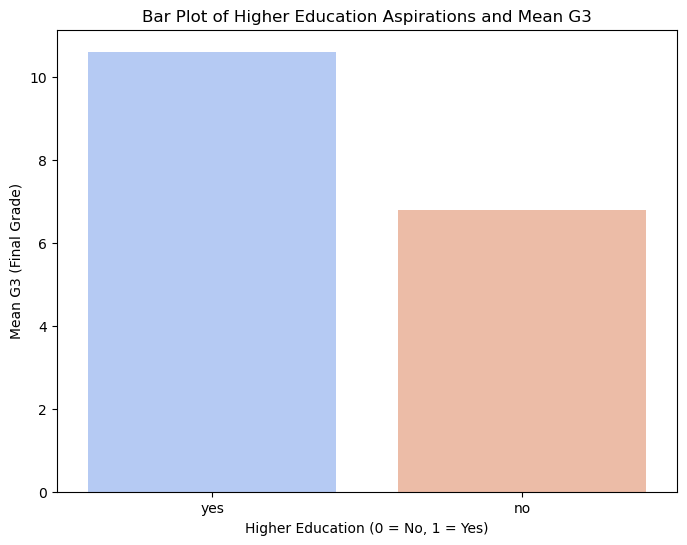

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x='higher', y='G3', data=performance, palette='coolwarm', ci=None)
plt.title('Bar Plot of Higher Education Aspirations and Mean G3')
plt.xlabel('Higher Education (0 = No, 1 = Yes)')
plt.ylabel('Mean G3 (Final Grade)')
plt.show()

##### It's clear here that students who want to pursue higher education clearly outperform those who dont want toseek higher education, this makes sense when we think about it because those who want to pursue higher education will try harder in classes and will show that they care just  a little more.

# Binary Feature Analysis 

##### I came up with this cool idea to go through all my binary features and compute the G3 mean of each option in each feature and then identify the features with the highest difference in means, these would basically be the features with the most impact on G3(binary features).

In [50]:
binary_columns = [col for col in performance.columns if performance[col].nunique() == 2]

mean_differences = {}

for col in binary_columns:
    if performance[col].dtype == 'object':
        unique_values = performance[col].unique()
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        performance[col] = performance[col].map(mapping)
    
    mean_g3_0 = performance[performance[col] == 0]['G3'].mean()
    mean_g3_1 = performance[performance[col] == 1]['G3'].mean()
    
    if pd.notna(mean_g3_0) and pd.notna(mean_g3_1):
        difference = abs(mean_g3_1 - mean_g3_0)
        mean_differences[col] = difference

top_5_differences = sorted(mean_differences.items(), key=lambda x: x[1], reverse=True)[:10]

for feature, diff in top_5_differences:
    print(f"{feature}: Difference in mean G3 = {diff:.2f}")

higher: Difference in mean G3 = 3.81
romantic: Difference in mean G3 = 1.26
internet: Difference in mean G3 = 1.21
address: Difference in mean G3 = 1.16
schoolsup: Difference in mean G3 = 1.13
sex: Difference in mean G3 = 0.95
paid: Difference in mean G3 = 0.94
Pstatus: Difference in mean G3 = 0.87
famsize: Difference in mean G3 = 0.82
school: Difference in mean G3 = 0.64


##### Ok, so I guess we see here that again, wanting to partake in higher education takes the top spot with the highest average in difference between responses.

# Categorical Feature Analysis

In [54]:
categorical_columns = [col for col in performance.columns if performance[col].dtype == 'object']

average_differences = {}

for column in categorical_columns:
    unique_categories = sorted(performance[column].unique())
    category_mapping = {val: idx for idx, val in enumerate(unique_categories)}
    performance[column + '_numeric'] = performance[column].map(category_mapping)
    
    g3_means = performance.groupby(column + '_numeric')['G3'].mean().sort_index()
    
    g3_differences = g3_means.diff().dropna()
    avg_diff = g3_differences.mean()
    
    if not pd.isna(avg_diff):
        average_differences[column] = avg_diff

top_5_differences = sorted(average_differences.items(), key=lambda x: abs(x[1]), reverse=True)[:10]

for feature, avg_diff in top_5_differences:
    print(f"{feature}: Average difference in G3 between consecutive categories = {avg_diff:.2f}")



guardian: Average difference in G3 between consecutive categories = -0.81
Mjob: Average difference in G3 between consecutive categories = 0.47
Fjob: Average difference in G3 between consecutive categories = 0.45
reason: Average difference in G3 between consecutive categories = 0.44


##### So here, I notice a feature that did not catch my eye in my prior EDA that I want to further investigate. That is the guardian feature. Although negative, it has the highest average difference between seperate responses in that column so I will do further EDA on it to determine if it will be an important feature for my model creation.

# Guardian Analysis

In [55]:
guardian_counts = performance['guardian'].value_counts()
print(guardian_counts)

mother    273
father     90
other      32
Name: guardian, dtype: int64


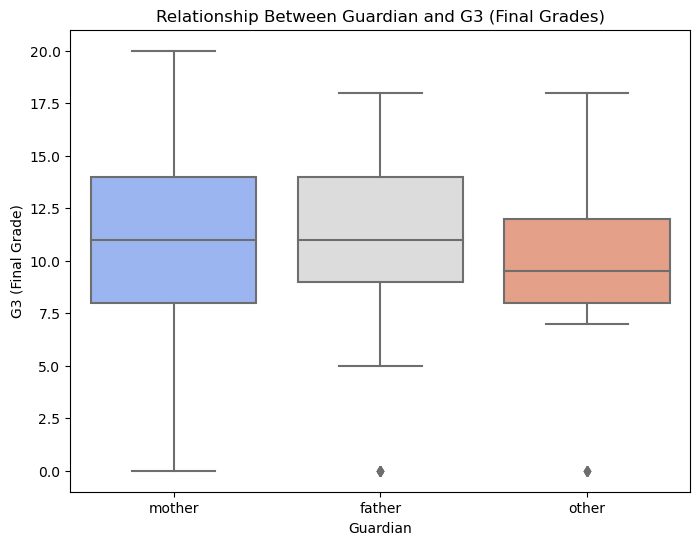

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x='guardian', y='G3', data=performance, palette='coolwarm')
plt.title('Relationship Between Guardian and G3 (Final Grades)')
plt.xlabel('Guardian')
plt.ylabel('G3 (Final Grade)')
plt.show()

In [57]:
guardian_g3_means = performance.groupby('guardian')['G3'].mean()
print(guardian_g3_means)

guardian
father    10.688889
mother    10.483516
other      9.062500
Name: G3, dtype: float64


##### Ok, so i think this might have been worth it. It seems as if students perform about the same when their guardian is listed as either their mother or their father, but there seems to be a drastic difference when students have "other" listed as their guardian. They seem to underperform a lot. Now the sample size is not as large as "mother' and "father" however, in my opinion, it is a large enough sample size that I could take it into consideration.